<a href="https://colab.research.google.com/github/rakshitakusanale/Road-sign-recognition-based-on-ML/blob/main/SDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/THU-MIG/yolov10.git

Cloning into 'yolov10'...
remote: Enumerating objects: 20332, done.
remote: Counting objects: 100% (2446/2446), done.
remote: Compressing objects: 100% (250/250), done.
remote: Total 20332 (delta 2317), reused 2197 (delta 2196), pack-reused 17886 (from 1)
Receiving objects: 100% (20332/20332), 11.14 MiB | 13.85 MiB/s, done.
Resolving deltas: 100% (14337/14337), done.


In [ ]:
%cd yolov10

/content/yolov10


In [ ]:
!pwd

/content/yolov10


In [ ]:
!pip install .

Processing /content/yolov10
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for ultralytics: filename=ultralytics-8.1.34-py3-none-any.whl size=731421 sha256=1bc493d7350fbfca42a88c2fb83c4f4ca9ae1779d8690203faf3ab9934bff988
  Stored in directory: /tmp/pip-ephem-wheel-cache-mj8qyu2l/wheels/51/93/e8/22d2e815ced343915c15d86b2a00d95eb0a997d012527fbea7
Successfully built ultralytics


In [ ]:
import os
import urllib.request

# Create a directory for the weights in the current working directory
weights_dir = os.path.join(os.getcwd(), "weights")
os.makedirs(weights_dir, exist_ok=True)

# URLs of the weight files
urls = [
    "https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10n.pt",
    "https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10s.pt",
    "https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10m.pt",
    "https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10b.pt",
    "https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10x.pt",
]

# Download each file
for url in urls:
    file_name = os.path.join(weights_dir, os.path.basename(url))
    urllib.request.urlretrieve(url, file_name)
    print(f"Downloaded {file_name}")

Downloaded /content/yolov10/weights/yolov10n.pt
Downloaded /content/yolov10/weights/yolov10s.pt
Downloaded /content/yolov10/weights/yolov10m.pt
Downloaded /content/yolov10/weights/yolov10b.pt
Downloaded /content/yolov10/weights/yolov10x.pt


In [ ]:
!unzip launch_sign.zip

Archive:  launch_sign.zip
  inflating: README.dataset.txt      
  inflating: README.roboflow.txt     
  inflating: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/C-10-_png.rf.a90e8c0a8241f57cf0a219321d333de6.jpg  
 extracting: test/images/C-13-_png.rf.235f669bb1ee4a053c5e42f57b5f6b7a.jpg  
 extracting: test/images/C-14-_png.rf.d1fbba1e8e8054a8f77f4cc67e218901.jpg  
 extracting: test/images/C-15-_png.rf.5cd21b351da3755dbb093028c7c0042d.jpg  
 extracting: test/images/C-18-_png.rf.94febed7745d56a422e665d8b3d66169.jpg  
 extracting: test/images/C-3-_png.rf.ffa1d84438cc54114f27d46a2d01e5c0.jpg  
 extracting: test/images/C-31-_png.rf.dda9913fc82aa526a5f1df7ff89d61dc.jpg  
 extracting: test/images/HOSPI-11-_png.rf.784349b5350a7c4edbb32e5282991755.jpg  
 extracting: test/images/HOSPI-12-_jpg.rf.eec43e48f48e70b729e2d8c3c386438c.jpg  
 extracting: test/images/HOSPI-3-_jpg.rf.b333f7f040b37ea09e8e9c963202659b.jpg  
 extracting: test/images/HOSPI-5-_j

In [ ]:
!yolo task=detect mode=train epochs=25 batch=16 plots=True model=weights/yolov10m.pt data=data.yaml

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:733: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_location="cpu")
New https://py

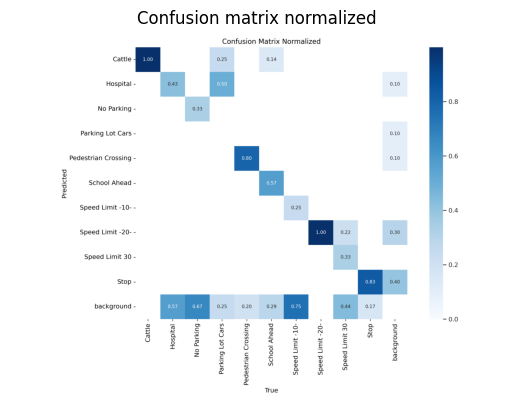

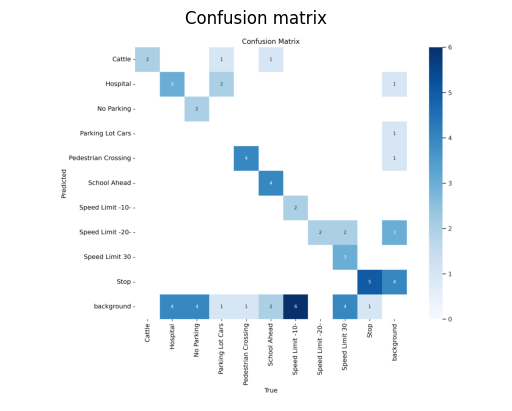

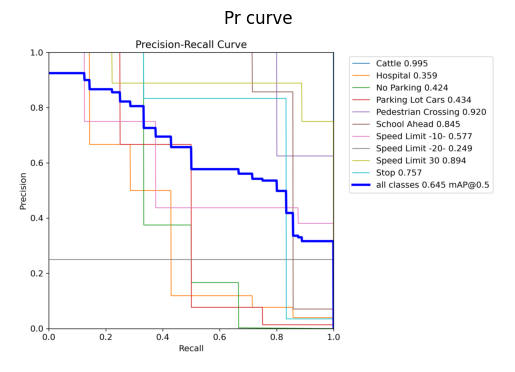

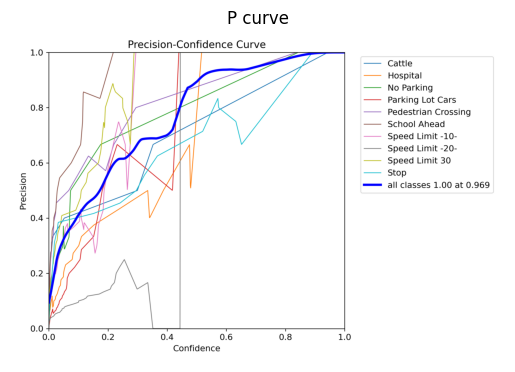

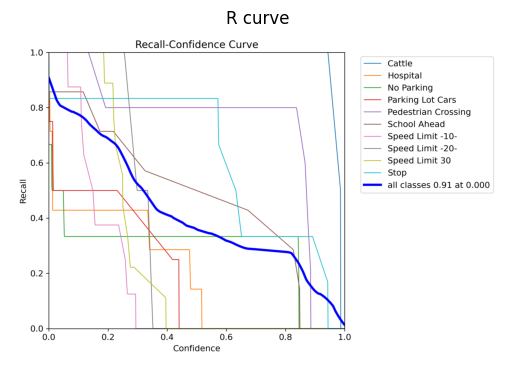

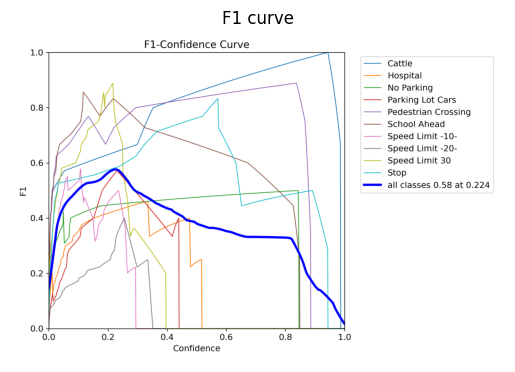

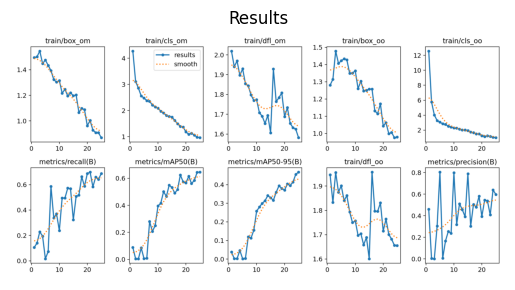

In [ ]:
import os
import matplotlib.pyplot as plt

# Path to the directory containing your result images
images_dir = "/content/yolov10/runs/detect/train"  # Replace with the correct path

# Get all PNG files in the directory
image_files = [f for f in os.listdir(images_dir) if f.endswith(".png")]

# Display each image
for image_file in image_files:
    img_path = os.path.join(images_dir, image_file)
    img = plt.imread(img_path)

    # Display the image
    plt.imshow(img)
    plt.axis("off")  # Hide axes for better visualization
    plt.title(image_file.replace(".png", "").replace("_", " ").capitalize())
    plt.show()


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
from ultralytics import YOLO
import cv2
import numpy as np
from PIL import Image as PILImage

# Function to capture a photo
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
    async function takePhoto(quality) {
        const div = document.createElement('div');
        const capture = document.createElement('button');
        capture.textContent = 'Capture';
        div.appendChild(capture);

        const video = document.createElement('video');
        video.style.display = 'block';
        const stream = await navigator.mediaDevices.getUserMedia({video: true});

        document.body.appendChild(div);
        div.appendChild(video);
        video.srcObject = stream;
        await video.play();

        // Resize the output to fit the video element.
        google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

        // Wait for Capture to be clicked.
        await new Promise((resolve) => capture.onclick = resolve);

        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);
        stream.getVideoTracks()[0].stop();
        div.remove();
        return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

# Load your YOLOv10 model
model = YOLO("runs/detect/train/weights/best.pt")  # Update the path to your model

# Function to run YOLOv10 model on the captured image
def detect_and_display(image_path):
    # Run YOLO detection
    results = model.predict(image_path, conf=0.25, save=False)  # Set conf threshold as needed

    # Load the original image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Visualize detections
    for result in results:
        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            conf = box.conf[0]
            label = result.names[box.cls[0]]

            # Draw bounding box and label
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(img, f"{label} {conf:.2f}", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Convert to PIL Image and display
    img = PILImage.fromarray(img)
    display(img)

# Main execution
try:
    # Capture photo
    filename = take_photo()
    print(f'Saved to {filename}')

    # Detect and display results
    detect_and_display(filename)
except Exception as err:
    print(str(err))


<IPython.core.display.Javascript object>

Saved to photo.jpg

'dict' object has no attribute 'shape'


In [ ]:
!yolo task=detect mode=predict conf=0.25 save=True model=/content/yolov10/runs/detect/train/weights/best.pt source=1.jpg
!yolo task=detect mode=predict conf=0.25 save=True model=/content/yolov10/runs/detect/train/weights/best.pt source=2.jpg
!yolo task=detect mode=predict conf=0.25 save=True model=/content/yolov10/runs/detect/train/weights/best.pt source=3.jpg

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:733: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_location="cpu")
Ultralytics YO

In [ ]:
from ultralytics import YOLO
import cv2
import numpy as np
from PIL import Image as PILImage
from IPython.display import display, clear_output

# Load your YOLOv10 model
model = YOLO("/content/yolov10/runs/detect/train/weights/best.pt")  # Update the path to your model

# Function to process frames and run YOLO detection
def process_frame(frame, model):
    # Convert frame to RGB for processing
    img_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Run YOLO detection
    results = model.predict(img_rgb, conf=0.25, save=False)  # Adjust confidence as needed

    # Draw bounding boxes and labels
    for result in results:
        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            conf = box.conf[0]
            label = result.names[box.cls[0]]

            # Draw bounding box and label
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(frame, f"{label} {conf:.2f}", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    return frame

# Open webcam for live video capture
cap = cv2.VideoCapture(0)  # Use 0 for the default webcam

try:
    while True:
        ret, frame = cap.read()  # Read a frame from the webcam
        if not ret:
            print("Failed to capture frame. Exiting...")
            break

        # Process the frame and detect objects
        processed_frame = process_frame(frame, model)

        # Display the processed frame
        cv2.imshow('YOLOv10 Traffic Sign Detection', processed_frame)

        # Break the loop on 'q' key press
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
finally:
    cap.release()
    cv2.destroyAllWindows()


Failed to capture frame. Exiting...
